# Laboratori 1

### Nom i cognom: 

Els objectiu d'aquest laboratori són:

1. Acostumar-te a les possibilitats que ens donen Python i els Jupyter notebooks - inclouent-hi el Markdown i les llibreries;
2. Experimentar amb senyals bàsics;
3. Jugar amb la transformada de Fourier; 
4. Començar a manipular imatges.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import signal

## Tasca 1

Si les mostres que tenim d'un senyal són masssa poc freqüents podem acabar amb una impressió equivocada sobre el senyal que tenim. En aquesta tasca demostra això amb un exemple. La teva figura hauria de semblar-se a la imatge.

![Nyquist frequency](https://www.dataphysics.com/wp-content/uploads/2022/01/Aliasing_1.jpg)

Fes servir text per explicar el teu experiment. Afegeix etiquetes (labels), llegenda i colors a la figura. Pots canviar tot el codi donat. (El <code>sharex = True</code> fa que puguis dibuixar diferents conjunts de valors per $x$ en el mateix gràfic.)

<StemContainer object of 3 artists>

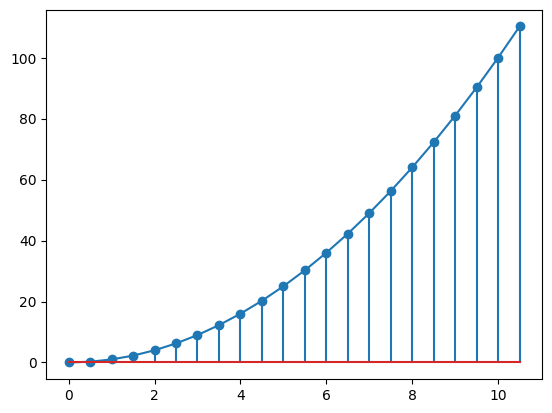

In [2]:
t = np.arange(0, 11, 0.5)
f = t**2


plt.plot(t, f)
plt.stem(t, f)
# plt.subplots(sharex = True)

## Tasca 2

Recorda't de la última pràctica de l'assignatura "Fonaments Físics per a l'Adquisició de Dades". Pots trobar les transperència a Caronte en Laboratori 1. En aquesta tasca fes el mateix exercisi en Python: Genera dos sons amb diferents frequències. Suma-los i escolta la barreja. Assegura't que les freqüències són tals que podem sentir els dos en la barreja.

Observa com hem fet servir la transformada de Fourier per calcular la freqüència del senyal. Amb la inversa de la transformada hem recuperat el so original.

Amb dos senyals barrejats tindràs dos pics en la gràfica. Modifica el vector freq per contenir només una de les dues. Comproba que amb això pots reccuperar els dos sons originals.


In [3]:
import IPython

In [4]:
t = np.arange(0, 5000)
sinewave = np.sin(t*2*np.pi/30)  

#plt.plot(t, sinewave)
IPython.display.Audio(sinewave, rate = 24000)

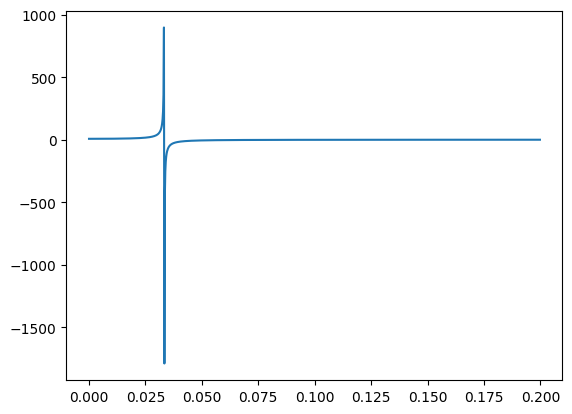

In [5]:
freq = scipy.fft.rfftfreq(t.size)
fourier_sinewave = scipy.fft.rfft(sinewave)
plt.plot(freq[0:1000], fourier_sinewave.real[0:1000])

In [6]:
rec_signal = np.fft.irfft(fourier_sinewave)
IPython.display.Audio(rec_signal, rate = 24000)

## Imatges

Comencem a processar imatges. Farem servir dues maneres diferents de carregar les imatges. Si el que tenim un fitxer de data "raw" com el fitxer "sinan.IMG" haurem de saber la seva mida.

In [7]:
from array import array

data = array('B')

SIZE = 256
with open('sinan.IMG', 'rb') as file:
    data.fromfile(file, SIZE*SIZE)
    
imgarray = [data[s:s + SIZE] for s in np.arange(0, len(data), SIZE)]

sinan = np.array(imgarray)

Si tenim un fitxer ".tif", ".png" o ".jpg" farem servir una llibreria. El fitxer pot venir de l'internet com en aquests exemples.

In [8]:
import skimage

In [9]:
lena = skimage.io.imread('https://www.eecs.northwestern.edu/~faisal/d20/lena.tif')
pout = skimage.io.imread("https://es.mathworks.com/help/images/basicimageimportprocessingandexportexample_01_es.png")
beans = skimage.io.imread("https://www.sci.utah.edu/~cscheid/spr05/imageprocessing/project1/imgs/seeds.jpg")

beans

array([[ 91,  91,  91, ..., 107, 107, 105],
       [ 91,  91,  91, ..., 106, 106, 104],
       [ 91,  91,  91, ..., 103, 103, 101],
       ...,
       [ 96,  91,  91, ..., 122, 120, 121],
       [ 97,  93,  91, ..., 121, 120, 119],
       [ 98,  96,  91, ..., 120, 121, 118]], dtype=uint8)

De moment farem servir imatges de 8bits/pixel. Per evitar que es normalitzin automàticament hem de dir a la funció <code>imshow</code> que 0 i 255 són el mínim i el màxim fixes.

In [10]:
def display_gray_256(img): 
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)

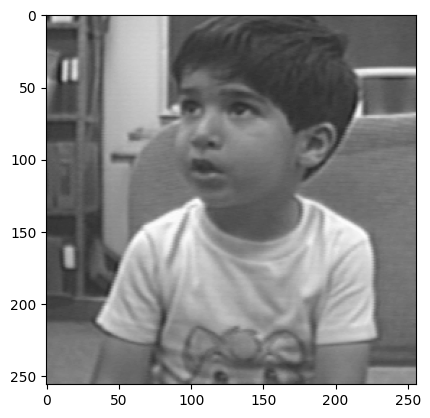

In [11]:
display_gray_256(sinan)

## Tasca 3

En aquesta tasca has de canviar els valors dels pixels per obtenir el negatiu de la imatge, per obtenir una imatge més fosca i una de més clara. 

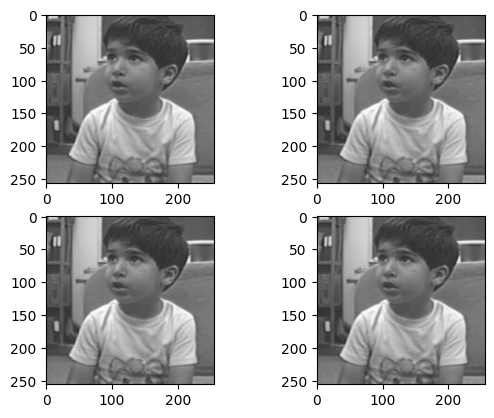

In [12]:
plt.subplot(2,2,1)
display_gray_256(sinan)

plt.subplot(2,2,2)
sinan_negatiu = sinan  # substitueix
display_gray_256(sinan_negatiu)

plt.subplot(2,2,3)
sinan_dark = sinan     # substitueix
display_gray_256(sinan_dark)

plt.subplot(2,2,4)
sinan_light = sinan    #substitueix
display_gray_256(sinan_light)

## Tasca 4

Escriu una funció que segmenta una imatge com la del Sinan en dos (blanc i negre) a partir d'un llindar (threshold). Es pot fer en una línia fent servir les mascares de Python. Aquí tens una pista: 

In [13]:
v = np.array([10, 2, 13, 7, 4, 11, 9, 1])
mask = (v % 2 == 0)
v[mask] = 100
print(mask, v)

[ True  True False False  True False False False] [100 100  13   7 100  11   9   1]


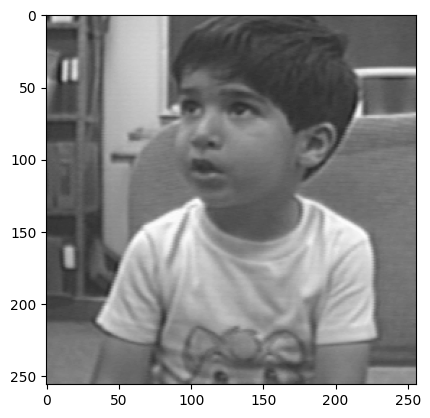

In [14]:
def segment(img, threshold):
    # substitueix el teu codi aquí
    return img

display_gray_256(segment(sinan, 100))

## Tasca 5

Escriu les funcions <code>reduce_sampling</code> i <code>reduce_quantization</code> que donat una imatge quadrada (pot assumir que les dimensions originals són $256 \times 256$) donada en forma de <code>np.array</code> i un parametre <code>k</code> (que sempre serà entre $0$ i $8$) redueixen el mostreig i la quantització de colors respectivament per $2^k$.

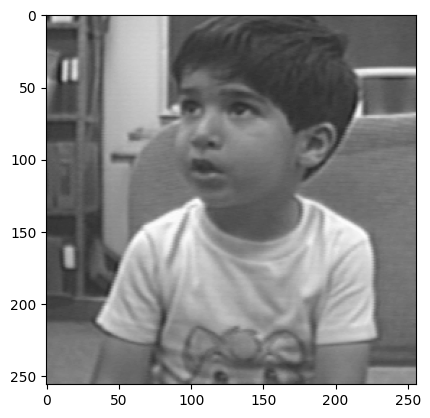

In [15]:
def reduce_sampling(imgarray, k):
    # substitueix el teu codi aquí
    return imgarray


display_gray_256(reduce_sampling(sinan, 2)) 

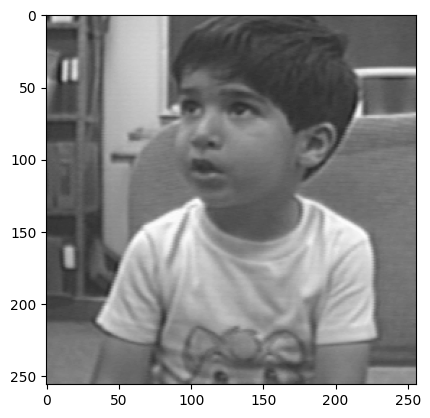

In [16]:
def reduce_quantization(img, k):
    # substitueix el teu codi aquí
    return img

display_gray_256(reduce_quantization(sinan, 5)) 



## Tasca 6

Escriu una funció que millora el contraste d'una imatge de manera que el color més clar és 0 i el més fosc és 255.

In [17]:
def improve_contrast(imgarray):
    # substitueix el teu codi aquí
    return imgarray
    

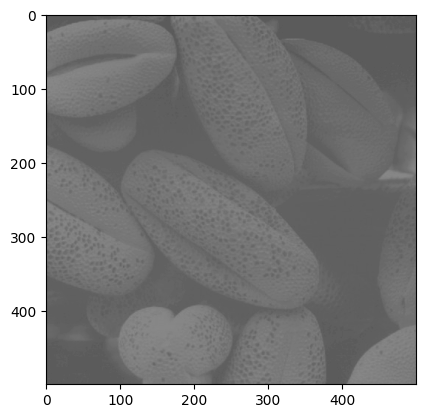

In [18]:
beans_contrast = improve_contrast(beans)
display_gray_256(beans_contrast)

In [19]:
print(np.min(beans), np.max(beans))

90 138


In [20]:
print(np.min(beans_contrast), np.max(beans_contrast))  #el resultat hauria de ser 0 255

90 138
